In [1]:
import nltk
import numpy as np
import pandas as pd
from textblob import TextBlob

In [5]:
import pandas as pd
data = pd.read_csv('Data/amazon_comments.csv')
data = data[['Review - Body', 'Review - Rating', 'Search']]
data

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_92945/3739916328.py:2: DtypeWarning: Columns (7,8,9,11,12,13,14,21,24,26,27,28,30,32,33,34,35,36,38,39,40,42,43,44,45,46,47,49,52,55,56,57,58,59,60,62,63,65,69,70,71,72,73,74,77,78,79,80,83,84,85,87,88,89,90,92,93,94,95,97,98,100,101,102,103,105,106,107,108,109,110,111,112,113,115,116,117,119,120,121,122,123,124,125,126,129,130,131,132,133,134,135,137) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data/amazon_comments.csv')


,Review - Body,Review - Rating,Search
0,\n\n\n\n\n\n\n\n \n \n The phone looks ex...,4.0 out of 5 stars,iPhone
1,\n\n\n\n\n\n\n\n \n \n Battery life is no...,4.0 out of 5 stars,iPhone
2,\n\n\n\n\n\n\n\n \n \n Perfect for my 11 ...,5.0 out of 5 stars,iPhone
3,\n\n\n\n\n\n\n\n \n \n It arrived within ...,3.0 out of 5 stars,iPhone
4,\n\n\n\n\n\n\n\n \n \n 2nd mobile phonr\n...,5.0 out of 5 stars,iPhone
...,...,...,...
21900,\n\n\n\n\n\n\n\n \n \n Purchased these af...,5.0 out of 5 stars,AirPods
21901,\n\n\n\n\n\n\n\n \n \n It is a perfect re...,5.0 out of 5 stars,AirPods
21902,\n\n\n\n\n\n\n\n \n \n The case works per...,5.0 out of 5 stars,AirPods
21903,\n\n\n\n\n\n\n\n \n \n These were a perfe...,5.0 out of 5 stars,AirPods


In [3]:
data.dropna(axis=0,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13120 entries, 0 to 13226
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   13120 non-null  int64 
 1   productCode  13120 non-null  object
 2   star         13120 non-null  int64 
 3   review       13120 non-null  object
dtypes: int64(2), object(2)
memory usage: 512.5+ KB


In [4]:
data.review

0        \nGood to have monthly payments but so quickly...
1        \nBefore we start, apologies for the long revi...
2        \nNice looking phone there seems to be a lot o...
3                     \nNew product and prompt delivery!\n
4        \nPhone is as expected from an iPhone 13. Not ...
                               ...                        
13222    \nSo happy with this product and delivery was ...
13223                                        \nGood item\n
13224    \nI bought this phone for my other half after ...
13225           \nLovely phone dose what I need it to do\n
13226                                    \nPerfect phone\n
Name: review, Length: 13120, dtype: object

In [5]:
data.star.value_counts(normalize=True)

5    0.661128
1    0.131860
4    0.105335
3    0.058155
2    0.043521
Name: star, dtype: float64

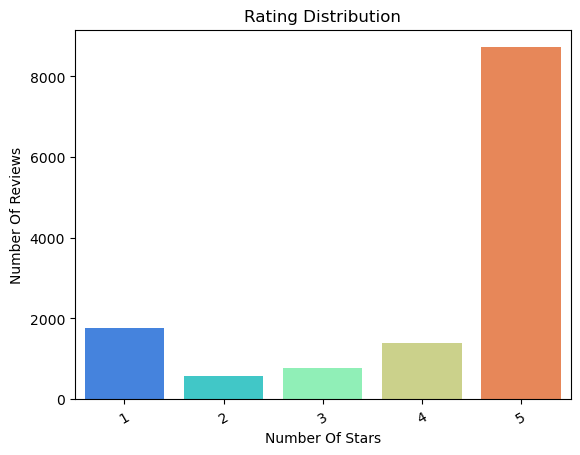

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

data2 = pd.read_csv('amazon_final.csv')

sns.barplot(x=data2.star.value_counts().sort_values(ascending=True).index,
                 y=data2.star.value_counts().sort_values(ascending=True),palette="rainbow")
plt.title("Rating Distribution")
plt.xlabel("Number Of Stars")
plt.ylabel("Number Of Reviews")
plt.xticks(rotation=30)
plt.savefig("sent.jpeg",dpi=300,bbox_inches="tight")

In [6]:
# Removing the reviews given 3 stars because they indicate neither positive nor negative mood.
data = data[data.star!=3]

# 4/5 Star --> Positive, 1/2 Star --> Negative
data['sentiment'] = data['star'].apply(lambda x: (x>=4 and 'Positive') or 'Negative')
data = data[['sentiment','star','review']]
data.head(10)

/var/folders/_k/_rt6thqx6mj63rxtq_q_l7j00000gn/T/ipykernel_22174/745778418.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['star'].apply(lambda x: (x>=4 and 'Positive') or 'Negative')


,sentiment,star,review
0,Positive,4,\nGood to have monthly payments but so quickly...
1,Positive,5,"\nBefore we start, apologies for the long revi..."
2,Positive,5,\nNice looking phone there seems to be a lot o...
3,Positive,5,\nNew product and prompt delivery!\n
4,Positive,4,\nPhone is as expected from an iPhone 13. Not ...
5,Positive,5,\nSon's present from Santa\n
6,Positive,4,\niPhones have a quality feel to them. This on...
7,Positive,5,\nMy previous phone was an iPhone X and when i...
8,Positive,5,"\niPhone, bought as present so can’t really wr..."
9,Positive,5,\nSecond one l have bought for my wife good pr...


In [7]:
# Checking the row number after deducting the reviews with 3 stars
len(data)

12357

In [8]:
# A large part of our dataset consists of comments showing positive mood
data.sentiment.value_counts(normalize=True)

Positive    0.81379
Negative    0.18621
Name: sentiment, dtype: float64

In [9]:
import re
import string

# Removing the \n expressions from the reviews
data['review'] = data['review'].str.replace("\n","")
# Removing the numbers from the reviews
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
# Removing the punctations from the reviews ve converting all letters to lowercase
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower()) 

data['review'] = data.review.map(alphanumeric).map(punc_lower)
data

,sentiment,star,review
0,Positive,4,good to have monthly payments but so quickly o...
1,Positive,5,before we start apologies for the long review...
2,Positive,5,nice looking phone there seems to be a lot of ...
3,Positive,5,new product and prompt delivery
4,Positive,4,phone is as expected from an iphone not muc...
...,...,...,...
13222,Positive,5,so happy with this product and delivery was sp...
13223,Positive,5,good item
13224,Positive,5,i bought this phone for my other half after th...
13225,Positive,5,lovely phone dose what i need it to do


In [10]:
#Other stemmer methods can be tried
from nltk.stem import SnowballStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import ISRIStemmer
from nltk.stem import PorterStemmer
from nltk.stem import RegexpStemmer
from nltk.stem import RSLPStemmer

sbs = SnowballStemmer(language='english')

In [11]:
def stemmer(text):
    text = [sbs.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

data.review = data.review.apply(stemmer)
data.review

0        good to have month payment but so quick out of...
1        befor we start  apolog for the long review  bu...
2        nice look phone there seem to be a lot of tin ...
3                         new product and prompt deliveri 
4        phone is as expect from an iphon    not much e...
                               ...                        
13222    so happi with this product and deliveri was sp...
13223                                            good item
13224    i bought this phone for my other half after th...
13225                 love phone dose what i need it to do
13226                                        perfect phone
Name: review, Length: 12357, dtype: object

In [12]:
from textblob import TextBlob

def correct(text):
    text = [str(TextBlob(word).correct()) for word in text.split(' ')]
    text = " ".join(text)
    print(text)
    return text

data.review = data.review.apply(correct)
data.review

0        good to have month payment but so quick out of...
1        before we start  apology for the long review  ...
2        nice look phone there seem to be a lot of tin ...
3                          new product and prompt deliver 
4        phone is as expect from an upon    not much ex...
                               ...                        
13222    so happy with this product and deliver was spo...
13223                                            good item
13224    i bought this phone for my other half after th...
13225                 love phone dose what i need it to do
13226                                        perfect phone
Name: review, Length: 12357, dtype: object

In [14]:
X = data.review
y = data.sentiment

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english') # Removing the stop words

# Applying CountVectorizer to Train and Test datasets
X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names_out()).head()

,ab,abbandonato,abbastanza,abbiamo,abbildungsleistung,abbondantement,abgefragt,abgegeben,abgelaufen,abgeranzt,...,übersättigt,übertrag,übertragen,übertroffen,überwiegt,überzeugt,überzogen,überzogenen,übrigen,üppige
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# Tokenizing using the 2-Way N-Gram method
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

df_x = pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names_out()).head()
df_x.to_csv('result_table.csv')
print(X_train)

2001     face  recognize was new to me and i love it  t...
3579     very disappoint with this phone and seller i h...
4260     il prodotto icon the sir revisionato  speriamo...
4580     ich bin vol   pro max au das   pro max umgesti...
4102     exact as describe  look brand new  battery hea...
                               ...                        
12814    para her reacondicionado me ha sorprendido  la...
5531                               perfect christmas gift 
5742     good value for money  look as good as new  exp...
907      decent upon with good camera  expel night time...
7756     il prodotto presentava un problems al microfon...
Name: review, Length: 8649, dtype: object


In [64]:
cv2.get_feature_names_out()

array(['ab', 'ab compatible', 'ab dem', ..., 'übrigen verlässlich',
       'üppige', 'üppige war'], dtype=object)

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [20]:
# DataFrame created by splitting into words
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [21]:
# DataFrame created using the 2-bin N-Gram method
lr.fit(X_train_cv2, y_train)
y_pred_cv2 = lr.predict(X_test_cv2)

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def conf_matrix(actual, predicted):
    plt.figure(figsize=[8,8])
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'], annot=True,
                fmt='d', annot_kws={'fontsize':35}, cmap="YlGnBu", square=True);

    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted, pos_label='Negative', zero_division=1)
    recall = recall_score(actual, predicted, pos_label='Negative', zero_division=1)
    f1 = f1_score(actual, predicted, pos_label='Negative', zero_division=1)
    # pos_label parametresi precision, recall ve f1 score unu görmek istediğimiz labelı soruyor
    # zero_division parametresi 0'a bölme işlemini gerçekleşirse uyarı verip vermeyeceğini soruyor (1=uyarı verme)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

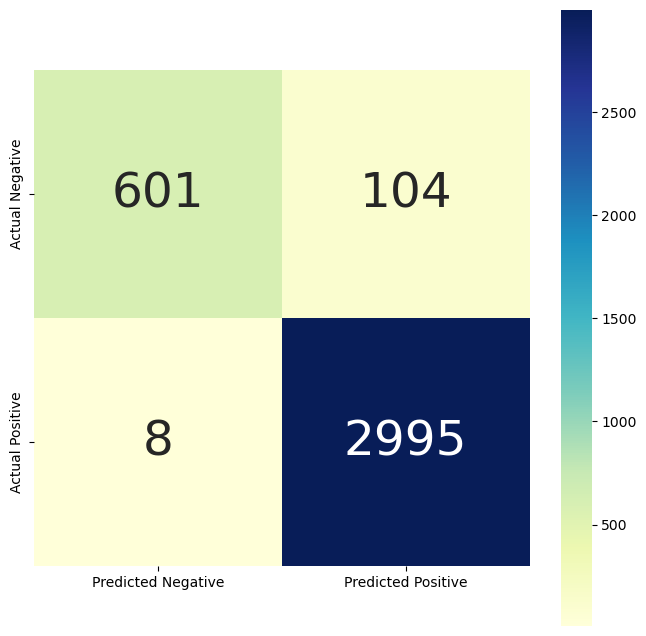

In [23]:
# The error matrix we obtained from our first model
cm1 = conf_matrix(y_test, y_pred_cv1)

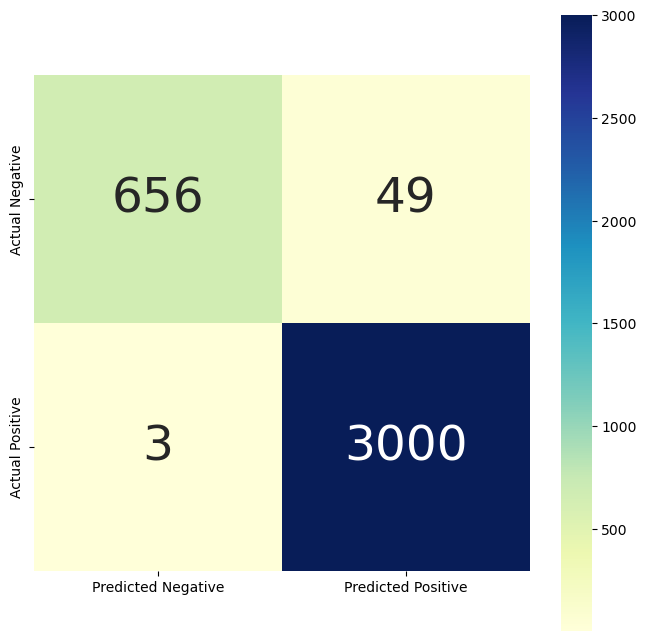

In [24]:
# The error matrix we obtained from our second model
cm2 = conf_matrix(y_test, y_pred_cv2)

In [25]:
results = pd.DataFrame(list(zip(cm1, cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LR(Word)-CV', 'LR(N-Grams)-CV']
results

,LR(Word)-CV,LR(N-Grams)-CV
Accuracy,0.969795,0.985976
Precision,0.986864,0.995448
Recall,0.852482,0.930496
F1 Score,0.914764,0.961877


In [26]:
# Training our models with the MultinomialNB algorithm
from sklearn.naive_bayes import MultinomialNB

mnb1 = MultinomialNB()
mnb1.fit(X_train_cv1, y_train)

mnb2 = MultinomialNB()
mnb2.fit(X_train_cv2, y_train)

y_pred_cv1_mnb = mnb1.predict(X_test_cv1)
y_pred_cv2_mnb = mnb2.predict(X_test_cv2)

In [27]:
# Training our models with the BernoulliNB algorithm
from sklearn.naive_bayes import BernoulliNB

bnb1 = BernoulliNB()
bnb1.fit(X_train_cv1, y_train)

bnb2 = BernoulliNB()
bnb2.fit(X_train_cv2, y_train)

y_pred_cv1_bnb = bnb1.predict(X_test_cv1)
y_pred_cv2_bnb = bnb2.predict(X_test_cv2)

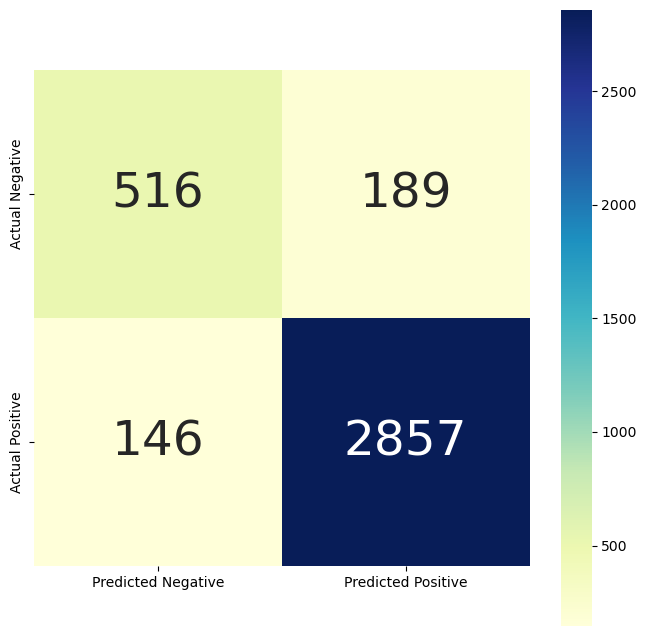

In [28]:
# MultinomialNB & Word
cm3 = conf_matrix(y_test, y_pred_cv1_mnb)

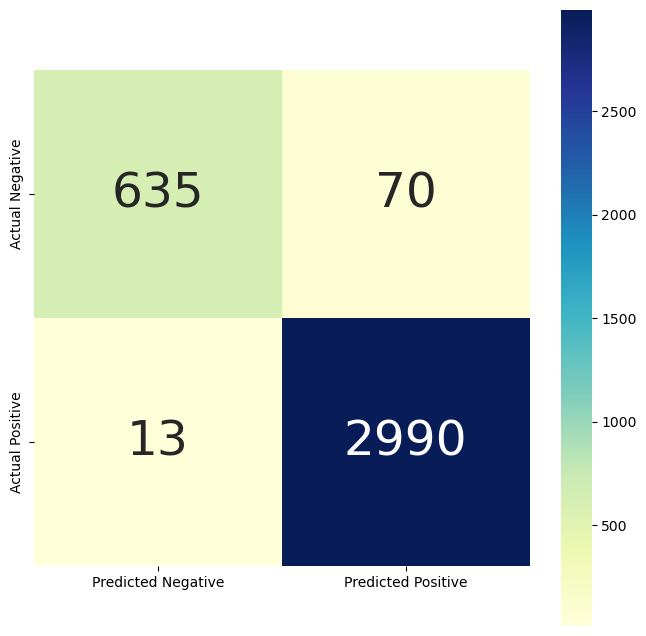

In [29]:
# MultinomialNB & 2-way N-Grams
cm4 = conf_matrix(y_test, y_pred_cv2_mnb)

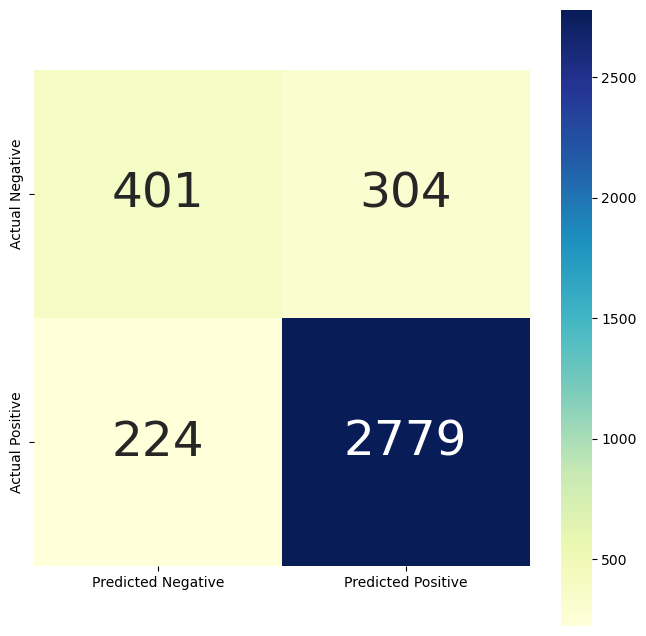

In [30]:
# BernoulliNB & Word
cm5 = conf_matrix(y_test, y_pred_cv1_bnb)

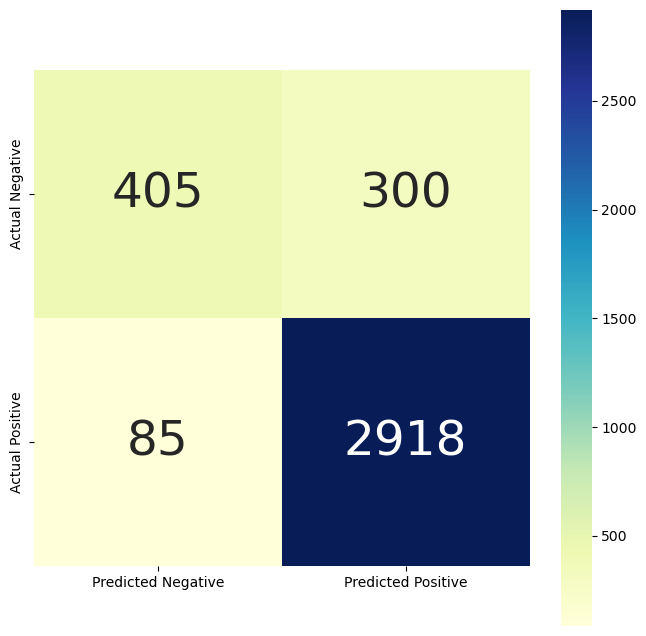

In [31]:
# BernoulliNB & 2-way N-Grams
cm6 = conf_matrix(y_test, y_pred_cv2_bnb)

In [32]:
results_nb = pd.DataFrame(list(zip(cm3, cm4, cm5, cm6)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['MNB(Word)-CV', 'MNB(N-Grams)-CV', 'BNB(Word)-CV', 'BNB(N-Grams)-CV']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

,LR(Word)-CV,LR(N-Grams)-CV,MNB(Word)-CV,MNB(N-Grams)-CV,BNB(Word)-CV,BNB(N-Grams)-CV
Accuracy,0.969795,0.985976,0.909655,0.977616,0.857605,0.896170
Precision,0.986864,0.995448,0.779456,0.979938,0.641600,0.826531
Recall,0.852482,0.930496,0.731915,0.900709,0.568794,0.574468
F1 Score,0.914764,0.961877,0.754938,0.938655,0.603008,0.677824


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)

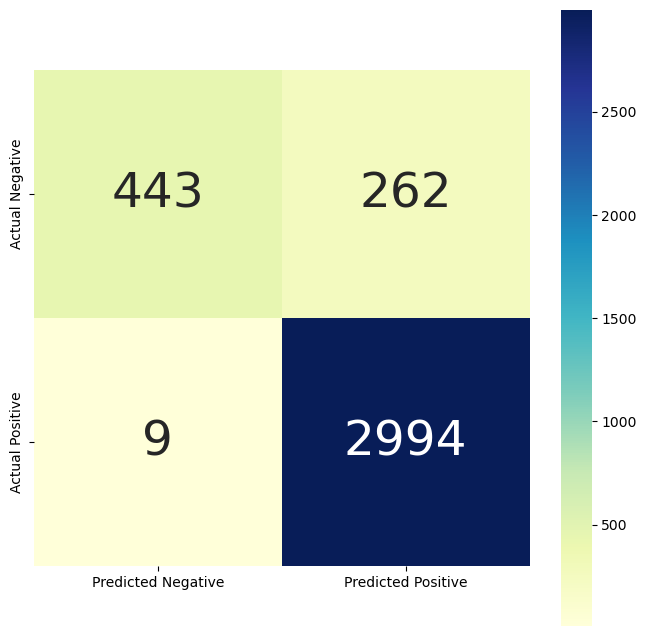

In [34]:
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)

# Logistic Regression & Word
cm7 = conf_matrix(y_test, y_pred_tfidf1_lr)

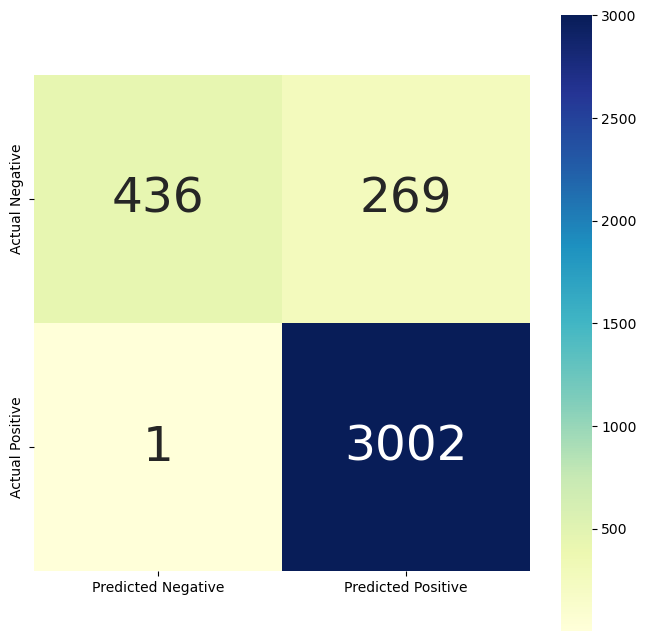

In [35]:
lr.fit(X_train_tfidf2, y_train)
y_pred_tfidf2_lr = lr.predict(X_test_tfidf2)

# Logistic Regression & 2-way N-Grams
cm8 = conf_matrix(y_test, y_pred_tfidf2_lr)

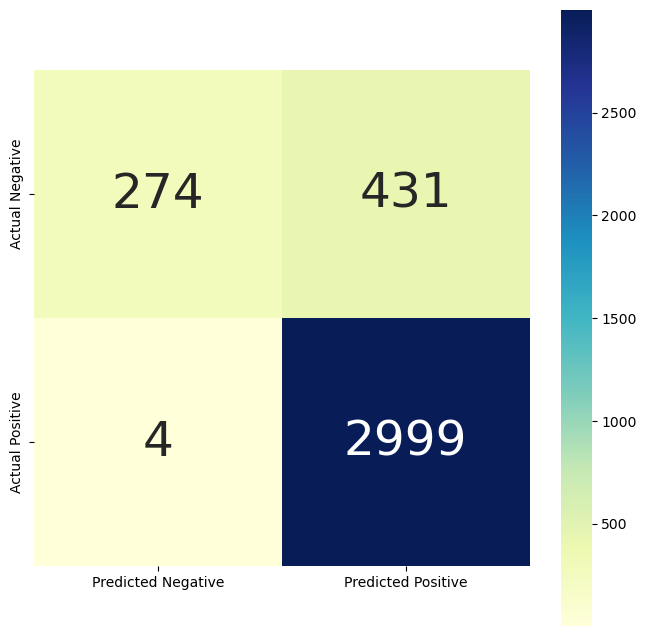

In [36]:
mnb1.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf1_mnb = mnb1.predict(X_test_tfidf1)

# MultinominalNB & Word
cm9 = conf_matrix(y_test, y_pred_tfidf1_mnb)

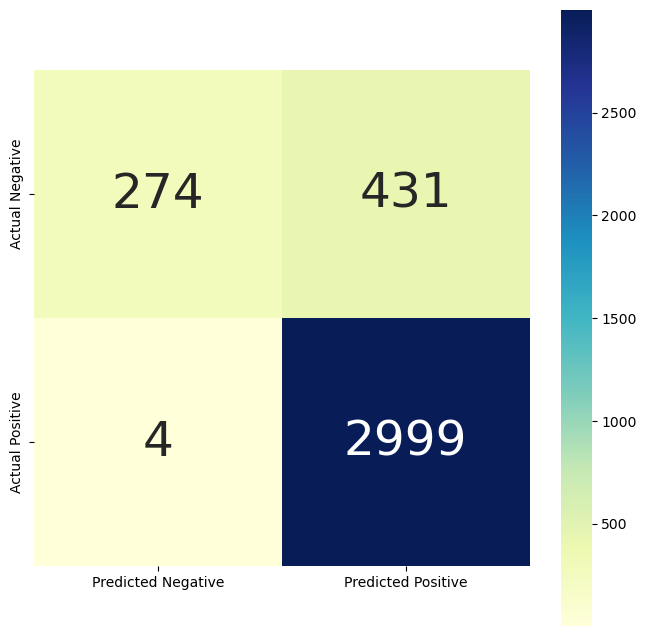

In [37]:
mnb2.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf2_mnb = mnb2.predict(X_test_tfidf1)

# MultinominalNB & 2-way N-Grams
cm10 = conf_matrix(y_test, y_pred_tfidf2_mnb)

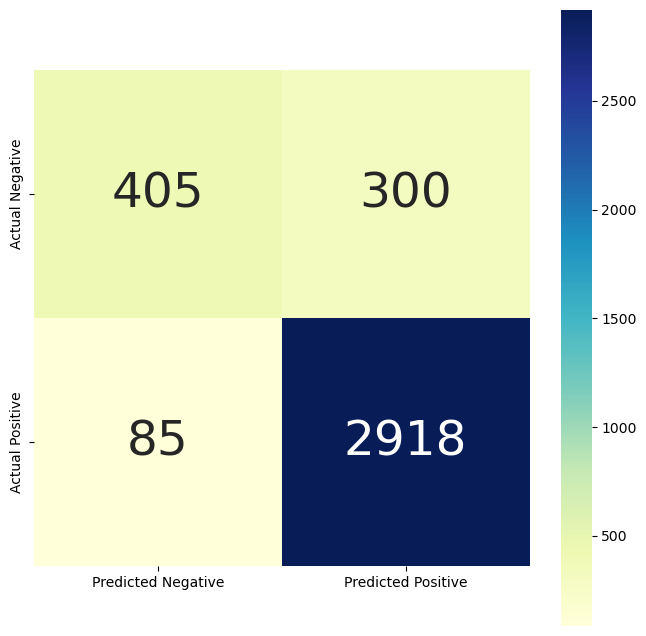

In [38]:
bnb1.fit(X_train_tfidf2.toarray(), y_train)
y_pred_tfidf1_bnb = bnb1.predict(X_test_tfidf2)

# BernoulliNB & Word
cm11 = conf_matrix(y_test, y_pred_tfidf1_bnb)

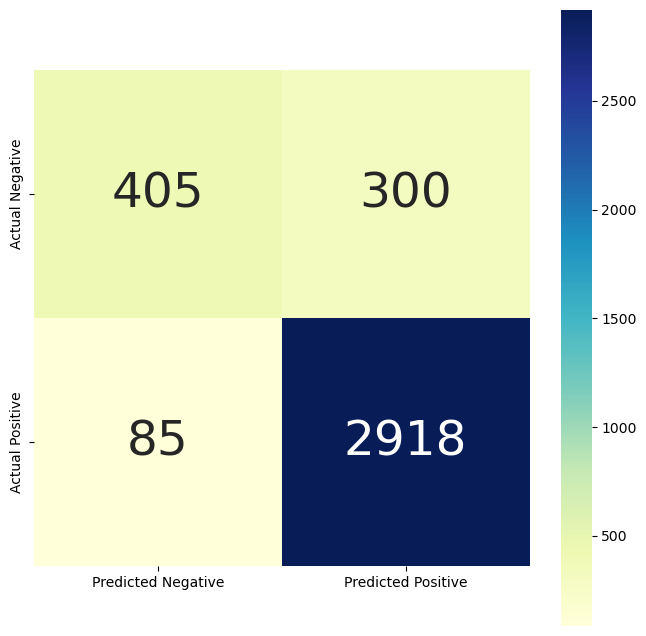

In [39]:
bnb2.fit(X_train_tfidf2.toarray(), y_train)
y_pred_tfidf2_bnb = bnb2.predict(X_test_tfidf2)

# BernoulliNB & 2-way N-Grams
cm12 = conf_matrix(y_test, y_pred_tfidf2_bnb)

In [40]:
results_tf = pd.DataFrame(list(zip(cm7, cm8, cm9, cm10, cm11, cm12)))
results_tf = results_tf.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tf.columns = ['LR(Word)-TFIDF', 'LR(N-Grams)-TFIDF', 'MNB(Word)-TFIDF', 
                      'MNB(N-Grams)-TFIDF', 'BNB(Word)-TFIDF', 'BNB(N-Grams)-TFIDF']
results_tf

results = pd.concat([results, results_tf], axis=1)
results

,LR(Word)-CV,LR(N-Grams)-CV,MNB(Word)-CV,MNB(N-Grams)-CV,BNB(Word)-CV,BNB(N-Grams)-CV,LR(Word)-TFIDF,LR(N-Grams)-TFIDF,MNB(Word)-TFIDF,MNB(N-Grams)-TFIDF,BNB(Word)-TFIDF,BNB(N-Grams)-TFIDF
Accuracy,0.969795,0.985976,0.909655,0.977616,0.857605,0.896170,0.926915,0.927184,0.882686,0.882686,0.896170,0.896170
Precision,0.986864,0.995448,0.779456,0.979938,0.641600,0.826531,0.980088,0.997712,0.985612,0.985612,0.826531,0.826531
Recall,0.852482,0.930496,0.731915,0.900709,0.568794,0.574468,0.628369,0.618440,0.388652,0.388652,0.574468,0.574468
F1 Score,0.914764,0.961877,0.754938,0.938655,0.603008,0.677824,0.765774,0.763573,0.557477,0.557477,0.677824,0.677824


Best Model: LR(N-Grams)-CV

In [69]:
lr = LogisticRegression()
lr.fit(X_train_cv2, y_train)
eli5.show_weights(lr, vec=cv2,feature_names=cv2.get_feature_names_out())

In [82]:
from sklearn.model_selection import cross_val_score

scores_accuracy = cross_val_score(lr, X_train_cv2, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores_accuracy)
print("Mean:", scores_accuracy.mean())
print("Standard Deviation:", scores_accuracy.std())

Scores: [0.98381503 0.9734104  0.9849711  0.97803468 0.98034682 0.97803468
 0.99190751 0.98612717 0.98265896 0.98726852]
Mean: 0.9826574876900022
Standard Deviation: 0.005090622427970945


In [83]:
from sklearn.metrics import make_scorer, precision_score, recall_score,f1_score

recall = make_scorer(recall_score, pos_label="Positive")
scores_recall = cross_val_score(lr, X_train_cv2, y_train, cv=10, scoring = recall)

print("Scores:", scores_recall)
print("Mean:", scores_recall.mean())
print("Standard Deviation:", scores_recall.std())

Scores: [0.99716714 0.99575071 1.         0.99716312 1.         0.99858156
 0.99858156 0.99716312 0.99574468 1.        ]
Mean: 0.9980151889578688
Standard Deviation: 0.0015784260454636513


In [84]:
precision = make_scorer(precision_score, pos_label="Positive")
scores_precision = cross_val_score(lr, X_train_cv2, y_train, cv=10, scoring = precision)

print("Scores:", scores_precision)
print("Mean:", scores_precision.mean())
print("Standard Deviation:", scores_precision.std())

Scores: [0.98324022 0.97233748 0.98191933 0.97638889 0.97645429 0.97506925
 0.9915493  0.98597475 0.98319328 0.98463687]
Mean: 0.981076367232815
Standard Deviation: 0.0055858512912471455


In [86]:
f1 = make_scorer(f1_score, pos_label="Positive")
scores_f1 = cross_val_score(lr, X_train_cv2, y_train, cv=10, scoring = f1)

print("Scores:", scores_f1)
print("Mean:", scores_f1.mean())
print("Standard Deviation:", scores_f1.std())

Scores: [0.99015471 0.98390483 0.99087719 0.98666667 0.9880869  0.98668535
 0.995053   0.99153738 0.98942918 0.99225897]
Mean: 0.9894654177499216
Standard Deviation: 0.0030687108688973136


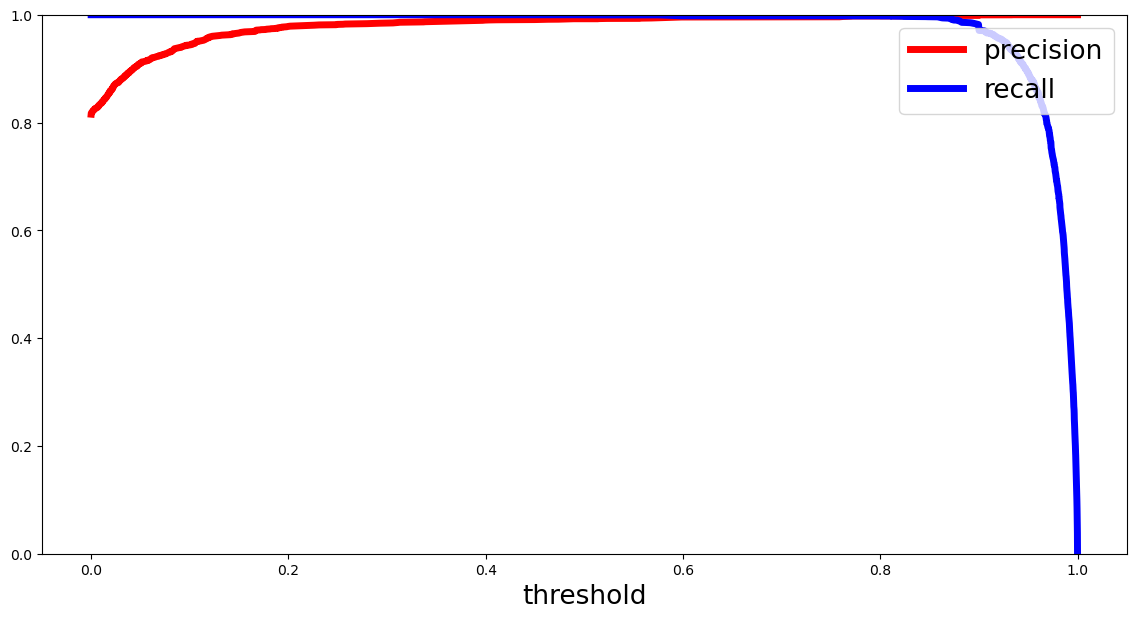

In [88]:
from sklearn.metrics import precision_recall_curve

y_scores = lr.predict_proba(X_train_cv2)
y_scores = y_scores[:,1]

y_train = y_train.map({'Positive': 1, 'Negative': 0}).astype(int)
precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=[14, 7])
plot_precision_and_recall(precision, recall, threshold)

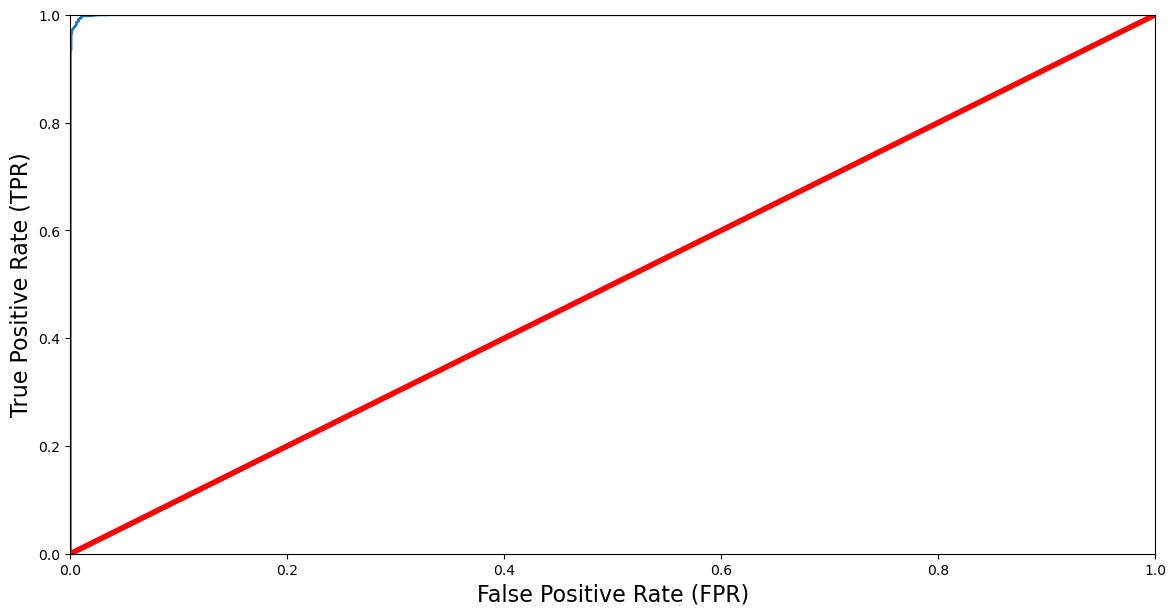

In [90]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=[14, 7])
plot_roc_curve(false_positive_rate, true_positive_rate)

In [91]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC Score:", r_a_score)

ROC-AUC Score: 0.9997638271916854


In [93]:
from joblib import dump, load

# Modeli pickle kullanarak kaydetme
dump(lr, 'amazon_comments_model.pkl')

['amazon_comments_model.pkl']